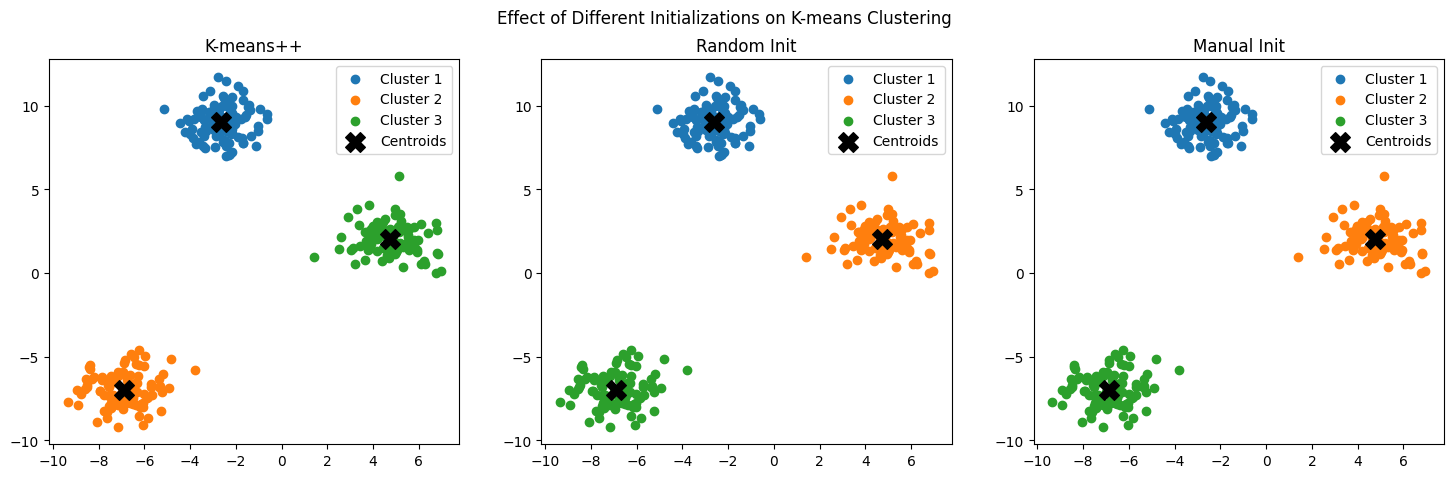

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

init_methods = [
    ('K-means++', 'k-means++'),
    ('Random Init', 'random'),
    ('Manual Init', np.array([[0, 0], [5, 5], [-5, -5]]))  
]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (title, init_method) in zip(axes, init_methods):

    kmeans = KMeans(n_clusters=3, init=init_method, n_init=10, random_state=42) if isinstance(init_method, str) \
             else KMeans(n_clusters=3, init=init_method, n_init=1, max_iter=300, random_state=42)
    
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

  
    for i in range(3):
        ax.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Cluster {i+1}')
    

    ax.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')
    
    ax.set_title(title)
    ax.legend()

plt.suptitle("Effect of Different Initializations on K-means Clustering")
plt.show()